<a href="https://colab.research.google.com/github/jscienciadados/tuning/blob/main/Tuning_dos_Parametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tunning dos Parâmetros com GridSearch

# Preparação dos Dados

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
print(X_credit_treinamento.shape, '-----', y_credit_treinamento.shape)
print('----------------------------------------------------------------')
print(X_credit_teste.shape, '---------', y_credit_teste.shape)

(1500, 3) ----- (1500,)
----------------------------------------------------------------
(500, 3) --------- (500,)


Concatenando as bases de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [ ]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [ ]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

# Arvore de Decisão

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}


In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


# Random Forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9860000000000001


# Knn

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


# Regressão Logistica

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


# SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}


In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


# Redes Neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}


In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_


In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9964999999999999


##Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  #print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())


# Visualizando os Resultados

In [ ]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9860,0.9840,0.9815,0.9475,0.9845,0.9965
1,0.9850,0.9830,0.9800,0.9465,0.9840,0.9970
2,0.9905,0.9845,0.9795,0.9470,0.9865,0.9975
3,0.9870,0.9820,0.9780,0.9460,0.9850,0.9970
4,0.9885,0.9840,0.9820,0.9465,0.9850,0.9970
5,0.9885,0.9825,0.9780,0.9465,0.9845,0.9970
6,0.9885,0.9850,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9855,0.9800,0.9480,0.9850,0.9965
8,0.9865,0.9865,0.9795,0.9465,0.9840,0.9975
9,0.9870,0.9800,0.9820,0.9465,0.9845,0.9970


In [ ]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987133,0.983583,0.980050,0.946950,0.985083,0.997050
std,0.001814,0.002186,0.001533,0.000687,0.001280,0.000422
min,0.982000,0.979500,0.977000,0.945500,0.982000,0.996500
25%,0.986125,0.982125,0.979000,0.946500,0.984125,0.996625
50%,0.987000,0.984000,0.980000,0.947000,0.985000,0.997000
75%,0.988375,0.985000,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.988500,0.982500,0.948500,0.987500,0.998000


In [ ]:
resultados.var()

Arvore           3.291954e-06
Random forest    4.777299e-06
KNN              2.350862e-06
Logistica        4.715517e-07
SVM              1.639368e-06
Rede neural      1.784483e-07
dtype: float64

In [ ]:
# Coeficiente de variação
(resultados.std() / resultados.mean()) * 100

Arvore           0.183802
Random forest    0.222218
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.042368
dtype: float64

# Teste de Normalidade nos Resultados

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica),shapiro(resultados_svm),shapiro(resultados_rede_neural)

((0.9593378305435181, 0.29790374636650085),
 (0.9708032608032227, 0.5613826513290405),
 (0.9584026336669922, 0.28181564807891846),
 (0.9370993375778198, 0.07600117474794388),
 (0.962294340133667, 0.35407164692878723),
 (0.8578012585639954, 0.0009071280364878476))

Gerando os plots

In [ ]:
import seaborn as sns

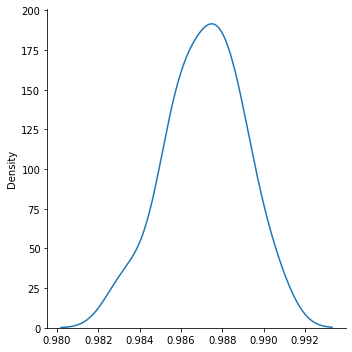

In [ ]:
sns.displot(resultados_arvore, kind='kde');

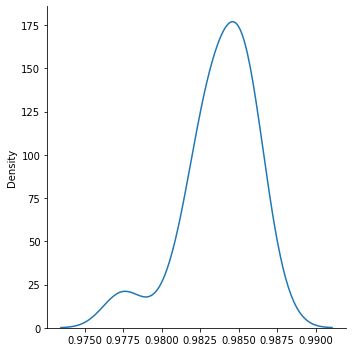

In [ ]:
sns.displot(resultados_random_forest, kind='kde')

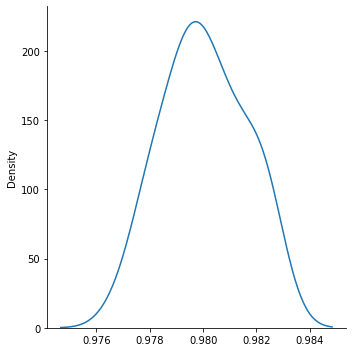

In [ ]:
sns.displot(resultados_knn, kind='kde')

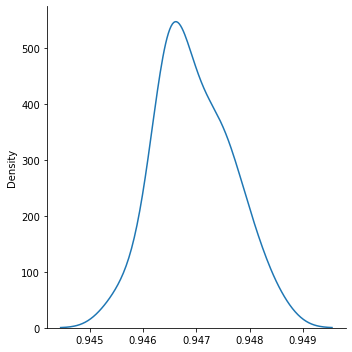

In [ ]:
sns.displot(resultados_logistica, kind='kde')

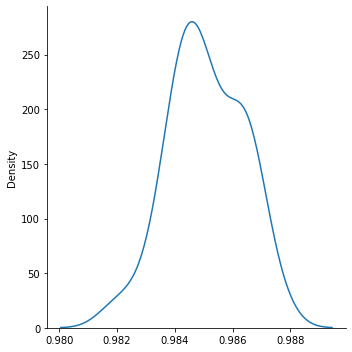

In [ ]:
sns.displot(resultados_svm, kind='kde')

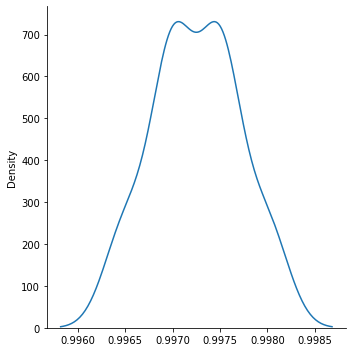

In [ ]:
sns.displot(resultados_rede_neural, kind='kde')

# Teste de Hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_,p = f_oneway(resultados_arvore, resultados_knn, resultados_logistica, resultados_random_forest,resultados_svm, resultados_rede_neural)

In [ ]:
p

4.278398954325748e-179

In [ ]:
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados iguais')  

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}


In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)

In [ ]:
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9850,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9885,arvore
...,...,...
175,0.9975,rede_neural
176,0.9965,rede_neural
177,0.9970,rede_neural
178,0.9965,rede_neural


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071  0.001 -0.0082  -0.006   True
       arvore     logistica  -0.0402  0.001 -0.0413 -0.0391   True
       arvore random_forest  -0.0035  0.001 -0.0046 -0.0025   True
       arvore   rede_neural   0.0099  0.001  0.0088   0.011   True
       arvore           svm   -0.002  0.001 -0.0031  -0.001   True
          knn     logistica  -0.0331  0.001 -0.0342  -0.032   True
          knn random_forest   0.0035  0.001  0.0025  0.0046   True
          knn   rede_neural    0.017  0.001  0.0159  0.0181   True
          knn           svm    0.005  0.001   0.004  0.0061   True
    logistica random_forest   0.0366  0.001  0.0356  0.0377   True
    logistica   rede_neural   0.0501  0.001   0.049  0.0512   True
    logistica           svm   0.0381  0.001  0.0371  0.0392   

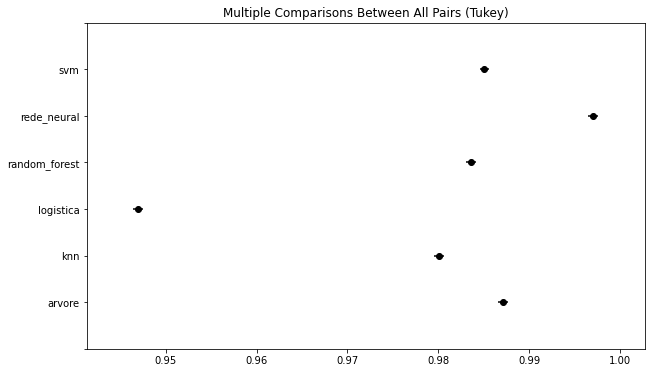

In [ ]:
teste_estatistico.plot_simultaneous();

In [ ]:
X_credit.shape

(2000, 3)

In [ ]:
y_credit.shape

(2000,)

# Salvar um classificador ja treinado

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Redes Neurais

In [ ]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=56, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Decision Tree

In [ ]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# SVM

In [ ]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Salvando os classificadores

In [ ]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Carregar um classificador ja treinado

In [ ]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

# Gerando uma previsao

In [ ]:
novo_registro = X_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [ ]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [ ]:
rede_neural.predict(novo_registro)

array([1])

In [ ]:
arvore.predict(novo_registro)


array([1])

In [ ]:
svm.predict(novo_registro)

array([1])

# Combinação de classificadores

In [ ]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [ ]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_arvore[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagará o empréstimo')

Cliente não pagará o empréstimo


# Rejeição de classificadores

In [ ]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [ ]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[5.63973018e-05, 9.99943603e-01]])

In [ ]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

0.9999436026981555

In [ ]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [ ]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9918840620014779

In [ ]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
  algoritmos += 1
  if resposta_rede_neural[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_svm >= confianca_minima:
  algoritmos += 1
  if resposta_svm[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))

Cliente não pagará o empréstimo, baseado em 1 algoritmos
